# Machine Selection Example

Selecting Machines to Optimally fulfill an Order.  It involves dividing a task among different machines to fulfill a customer order while minimizing total cost.  Each machine varies in operating cost, production speed and ability to perform different elements of task. The correct combination of machines must be selected to fulfill the customer order.

**Problem:**  
Three machines perform the same generic type of task: They all make bolts. Each machine varies in the variety of bolts that it can produce. Each machine also has a different operating cost and a different operating speed. The objective is to fulfill an individual customer order within a specified time limit while minimizing the total cost of fulfilling this order. 500 Minutes is the total time allowed to complete this entire order.

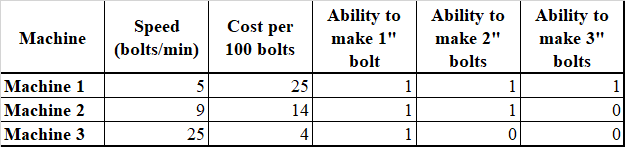

In [40]:
from pulp import *

#Create a problem
prob=LpProblem("Minimum cost",LpMinimize)

#Create the varialbes
Machine1_1in=LpVariable('Machine 1, 1"',0,None, LpInteger)
Machine1_2in=LpVariable('Machine 1, 2"',0,None, LpInteger)
Machine1_3in=LpVariable('Machine 1, 3"',0,None, LpInteger)
Machine2_1in=LpVariable('Machine 2, 1"',0,None, LpInteger)
Machine2_2in=LpVariable('Machine 2, 2"',0,None, LpInteger)
Machine2_3in=LpVariable('Machine 2, 3"',0,None, LpInteger)
Machine3_1in=LpVariable('Machine 3, 1"',0,None, LpInteger)
Machine3_2in=LpVariable('Machine 3, 2"',0,None, LpInteger)
Machine3_3in=LpVariable('Machine 3, 3"',0,None, LpInteger)

#Simplification of variables
X1_1=Machine1_1in
X1_2=Machine1_2in
X1_3=Machine1_3in
X2_1=Machine2_1in
X2_2=Machine2_2in
X2_3=Machine2_3in
X3_1=Machine3_1in
X3_2=Machine3_2in
X3_3=Machine3_3in

#Variables in a list
X=[X1_1,X1_2,X1_3,X2_1,X2_2,X2_3,X3_1,X3_2,X3_3]

#Other data
cost=[.25,.25,.25,.14,.14,.14,.04,.04,.04]

time=[5**(-1),5**(-1),5**(-1),9**(-1),9**(-1),9**(-1),25**(-1),25**(-1),25**(-1)]

ability=[1,1,1,1,1,0,1,0,0]

#Objective function
prob+=X[0]*cost[0]+X[1]*cost[1]+X[2]*cost[2]+X[3]*cost[3]+X[4]*cost[4]+X[5]*cost[5]+X[6]*cost[6]+X[7]*cost[7]+X[8]*cost[8]

#Constraints
prob+=X[0]*time[0]+X[1]*time[1]+X[2]*time[2]<=500
prob+=X[3]*time[3]+X[4]*time[4]+X[5]*time[5]<=500
prob+=X[6]*time[6]+X[7]*time[7]+X[8]*time[8]<=500

prob+=X[0]*ability[0]+X[3]*ability[3]+X[6]*ability[6]==16000
prob+=X[1]*ability[1]+X[4]*ability[4]+X[7]*ability[7]==3000
prob+=X[2]*ability[2]+X[5]*ability[5]+X[8]*ability[8]==400

#Solution to the optimization problem
prob.solve()
print ("Status:",LpStatus[prob.status])
print("")
for v in prob.variables():
    print (v.name,"=",v.varValue)
print("")
print("Total Cost =",value(prob.objective))

Status: Optimal

Machine_1,_1" = 2000.0
Machine_1,_2" = 0.0
Machine_1,_3" = 400.0
Machine_2,_1" = 1500.0
Machine_2,_2" = 3000.0
Machine_2,_3" = 0.0
Machine_3,_1" = 12500.0
Machine_3,_2" = 0.0
Machine_3,_3" = 0.0

Total Cost = 1730.0
